In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="HAL",
    user="postgres",
    password="6996"
)


In [2]:
query = "SELECT * FROM house_data;"
data = pd.read_sql_query(query, conn)

total_rows = len(data)
total_rows_and_columns = data.shape
print("Общее количество строк:", total_rows)
print("Количество строк и столбцов:", total_rows_and_columns)

data.info()


C:\Users\Dias\AppData\Local\Temp\ipykernel_3936\1322385660.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


Общее количество строк: 21612
Количество строк и столбцов: (21612, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 no

In [3]:

avg_by_bedrooms = data.groupby('bedrooms').agg({'bedrooms': 'count', 'price': 'mean'})
print(avg_by_bedrooms)


          bedrooms         price
bedrooms                        
0               13  4.102231e+05
1              199  3.176580e+05
2             2760  4.013877e+05
3             9823  4.662528e+05
4             6882  6.355647e+05
5             1601  7.868741e+05
6              272  8.258535e+05
7               38  9.514478e+05
8               13  1.105077e+06
9                6  8.939998e+05
10               3  8.200000e+05
11               1  5.200000e+05
33               1  6.400000e+05


In [4]:

most_expensive_apartment = data.loc[data['price'].idxmax()]
print("Самая дорогая квартира:\n", most_expensive_apartment)


Самая дорогая квартира:
 id               6762700020
date             2014-10-13
price             7700000.0
bedrooms                  6
bathrooms               8.0
sqft_living           12050
sqft_lot              27600
floors                  2.5
waterfront                0
view                      3
condition                 4
grade                    13
sqft_above             8570
sqft_basement          3480
yr_built               1910
yr_renovated           1987
zipcode               98102
lat                 47.6298
long               -122.323
sqft_living15          3940
sqft_lot15             8800
Name: 7251, dtype: object


In [5]:

print(data.describe())


                 id         price      bedrooms     bathrooms   sqft_living   
count  2.161200e+04  2.161200e+04  21612.000000  21612.000000  21612.000000  \
mean   4.580235e+09  5.401748e+05      3.370859      2.114786   2079.922867   
std    2.876615e+09  3.673691e+05      0.930080      0.770170    918.455851   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.218375e+05      3.000000      1.750000   1426.500000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition   
count  2.161200e+04  21612.000000  21612.000000  21612.000000  21612.000000  \
mean   1.510744e+04      1.494332      0.007542      0.234314      3.409448   
std    4.142141e+04      0.539991      0.086519    

In [6]:

print(data.head())  # Первые 5 строк
print(data.tail())  # Последние 5 строк


           id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  2014-10-13  221900.0         3       1.00         1180  \
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
0      5650     1.0           0     0  ...      7        1180              0  \
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15   
0      19

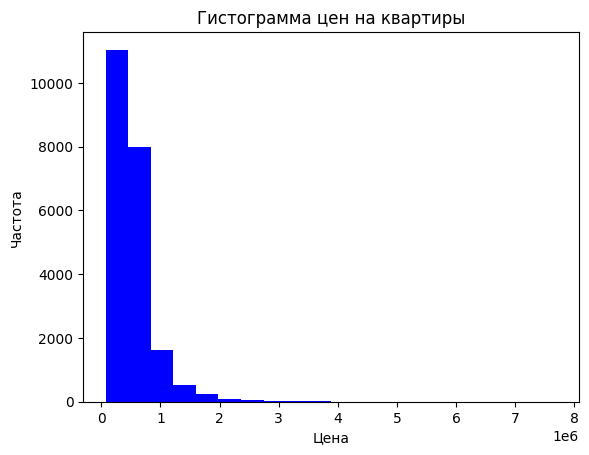

In [7]:


# Визуализация данных:
prices = data['price']

# Создаем гистограмму
plt.hist(prices, bins=20, color='blue')  
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Гистограмма цен на квартиры')
plt.show()


conn.close()
